A base de dados escolhida é uma anotação geral do andamento do Bitcoin e seu valor em Euros (€) de 2014 até 2024.

Importando a biblioteca, importando o CSV e visualizando o dataframe gerado.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("./datasets/BTC-EUR.csv")

In [9]:
df

,Data,Aberto,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume
0,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
1,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
3,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625
4,2014-09-22,310.849762,316.469116,309.170898,312.958771,312.958771,18776342
...,...,...,...,...,...,...,...
3462,2024-03-11,62594.437500,63969.632813,62389.562500,63072.972656,63072.972656,32609410343
3463,2024-03-12,63073.671875,66681.351563,61394.554688,65983.203125,65983.203125,60121474891
3464,2024-03-13,65984.320313,66760.812500,62943.257813,65417.820313,65417.820313,57248192058
3465,2024-03-14,65418.574219,67372.179688,65274.687500,66723.851563,66723.851563,44017130178


Traduzindo as colunas para melhor entendimento...


In [6]:
#traduzindo as colunas
df = df.rename(columns={"Date":"Data","Open":"Aberto","High":"Alta","Low":"Baixa","Close":"Fechamento","Adj Close":"Fechamento Ajustado"})

In [7]:
df.head(10)

,Data,Aberto,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume
0,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
1,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
3,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625
4,2014-09-22,310.849762,316.469116,309.170898,312.958771,312.958771,18776342
5,2014-09-23,312.912079,343.704376,307.343872,339.189758,339.189758,35102351
6,2014-09-24,339.158630,339.307556,327.882263,331.250000,331.250000,23972840
7,2014-09-25,331.211639,331.444672,321.226959,322.676605,322.676605,21022658
8,2014-09-26,322.562897,325.339478,314.102081,318.896851,318.896851,16922252
9,2014-09-27,318.211639,320.630005,313.335449,315.029175,315.029175,11850891


Vamos verificar os tipos de dados nas colunas

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 3467 non-null   object 
 1   Aberto               3467 non-null   float64
 2   Alta                 3467 non-null   float64
 3   Baixa                3467 non-null   float64
 4   Fechamento           3467 non-null   float64
 5   Fechamento Ajustado  3467 non-null   float64
 6   Volume               3467 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 189.7+ KB


Veja que a Data está como tipo **object** isso pode causar algum problema futuramente... Vamos alterar.

In [38]:
df['Data'] = pd.to_datetime(df['Data'])

Verificando novamente

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 3467 non-null   datetime64[ns]
 1   Aberto               3467 non-null   float64       
 2   Alta                 3467 non-null   float64       
 3   Baixa                3467 non-null   float64       
 4   Fechamento           3467 non-null   float64       
 5   Fechamento Ajustado  3467 non-null   float64       
 6   Volume               3467 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 189.7 KB


Agora sim, nossa coluna Data se encontra com o tipo datetime

Vamos descrever um pouco essa base de dados usando a função:

```
.describe()
```
Que funciona para sabermos alguns dados estatísticos sobre nossa base de dados


In [8]:
df.describe()

,Aberto,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3.467000e+03
mean,13636.377684,13947.717732,13310.217710,13653.238201,13653.238201,1.501945e+10
std,14868.606452,15216.428281,14502.372908,14889.033890,14889.033890,1.678436e+10
min,150.128998,183.047470,145.483078,151.152512,151.152512,4.640334e+06
25%,924.927063,942.675720,894.079712,931.229615,931.229615,1.790236e+08
50%,7423.152344,7625.808105,7231.393555,7424.631348,7424.631348,1.104118e+10
75%,24108.063476,24539.296875,23864.004883,24122.210938,24122.210938,2.489693e+10
max,65984.320313,67372.179688,65274.687500,66723.851563,66723.851563,2.907271e+11


Agora, continuaremos filtrando valores e visualizando quando o Bitcoin teve um fechamento valendo mais.

In [40]:
df.sort_values("Fechamento Ajustado", ascending=False)

,Data,Aberto,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume
3465,2024-03-14,65418.574219,67372.179688,65274.687500,66723.851563,66723.851563,44017130178
3463,2024-03-12,63073.671875,66681.351563,61394.554688,65983.203125,65983.203125,60121474891
3464,2024-03-13,65984.320313,66760.812500,62943.257813,65417.820313,65417.820313,57248192058
3462,2024-03-11,62594.437500,63969.632813,62389.562500,63072.972656,63072.972656,32609410343
3456,2024-03-05,58233.406250,63129.390625,57511.949219,62955.000000,62955.000000,65110966484
...,...,...,...,...,...,...,...
340,2015-08-24,200.520386,200.561768,181.666946,181.774612,181.774612,51140501
119,2015-01-15,150.128998,195.733582,150.154495,180.371323,180.371323,70288382
120,2015-01-16,179.706039,191.010254,173.111786,179.905762,179.905762,33216046
121,2015-01-17,179.678391,183.047470,168.474976,172.265930,172.265930,20290222


Agora vamos consultar como anda o Bitcoin em geral neste inicio de ano -  (01/01/2024 até 14/03/2024)

In [41]:
#Filtrando as datas do primeiro dia de janeiro até o último dia encontrado no CSV
df_2024 = df.loc[(df['Data'] >= '2024-01-01')]
df_2024

,Data,Aberto,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume
3392,2024-01-01,38127.710938,38768.875000,37988.554688,38291.835938,38291.835938,14855969946
3393,2024-01-02,38305.468750,40025.593750,38219.160156,40018.605469,40018.605469,16696095504
3394,2024-01-03,40036.550781,41609.734375,40027.320313,41089.292969,41089.292969,35950434827
3395,2024-01-04,41092.613281,41576.949219,37371.320313,39215.980469,39215.980469,42413930730
3396,2024-01-05,39222.968750,40898.175781,39071.597656,40360.082031,40360.082031,27815518796
...,...,...,...,...,...,...,...
3462,2024-03-11,62594.437500,63969.632813,62389.562500,63072.972656,63072.972656,32609410343
3463,2024-03-12,63073.671875,66681.351563,61394.554688,65983.203125,65983.203125,60121474891
3464,2024-03-13,65984.320313,66760.812500,62943.257813,65417.820313,65417.820313,57248192058
3465,2024-03-14,65418.574219,67372.179688,65274.687500,66723.851563,66723.851563,44017130178


In [42]:
df_2024_fechado = df_2024['Fechamento Ajustado']

Podemos agora descrever simplesmente alguns dados referente específicamente ao fechamento ajustado do Bitcoin neste ano que realmente aponta seu valor:

In [26]:
df_2024_fechado.describe()

count       75.000000
mean     46174.012344
std       8845.423859
min      36317.148438
25%      39458.390625
50%      42220.636719
75%      48383.675781
max      66723.851563
Name: Fechamento Ajustado, dtype: float64

Pode-se observar que a média (mean) se encontra +- entre €46174.01, o mínimo (min) em €36317.1 e o máximo em €66723.8 e um desvio padrão de €8845.42

Agora podemos exibir em um print simples esses dados

In [43]:
min = df_2024_fechado.min()
max = df_2024_fechado.max()
mean = df_2024_fechado.mean()
std = df_2024_fechado.std()

print(f'O Valor do Bitcoin em Euro (€) em 2024 se encontra até agora nessa situação:')
print(f'Mínimo: {min:.2f}')
print(f'Máximo: {max:.2f}')
print(f'Média: {mean:.2f}')
print(f'Desvio Padrão: {std:.2f}')

O Valor do Bitcoin em Euro (€) em 2024 se encontra até agora nessa situação:
Mínimo: 36317.15
Máximo: 66723.85
Média: 46174.01
Desvio Padrão: 8845.42


Podemos obviamente abranger essa consulta para N datas utilizando essa função:

In [44]:
def consultar_bitcoin_por_data(data_inicio, data_fim):

    data_inicio = pd.to_datetime(data_inicio)
    data_fim = pd.to_datetime(data_fim)

    # Filtrando o DataFrame com base nas datas
    df_2024 = df.loc[(df['Data'] >= data_inicio) & (df['Data'] < data_fim)]

    # Calculando estatísticas
    min_val = df_2024['Fechamento Ajustado'].min()
    max_val = df_2024['Fechamento Ajustado'].max()
    mean_val = df_2024['Fechamento Ajustado'].mean()
    std_val = df_2024['Fechamento Ajustado'].std()

    # Imprimindo os resultados
    print(f'O Valor do Bitcoin em Euro (€) entre {data_inicio.date()} até {data_fim.date()} se encontra até agora nessa situação:')
    print(f'Mínimo: {min_val:.2f}')
    print(f'Máximo: {max_val:.2f}')
    print(f'Média: {mean_val:.2f}')
    print(f'Desvio Padrão: {std_val:.2f}')

data_inicio = input("Digite a data de inicio da busca: ")
data_fim = input("Digite a data final da busca: ")

consultar_bitcoin_por_data(data_inicio,data_fim)

Digite a data de inicio da busca:2020-01-01
Digite a data final da busca2021-01-01
O Valor do Bitcoin em Euro (€) entre 2020-01-01 até 2021-01-01 se encontra até agora nessa situação:
Mínimo: 4444.24
Máximo: 23741.74
Média: 9637.35
Desvio Padrão: 3356.54


Agora para finalizar, um gráfico simples de análise desde o inicio até hoje.

Para isso, devemos importar mais uma biblioteca:

In [48]:
import matplotlib.pyplot as plt

Agora vamos ao gráfico em si:

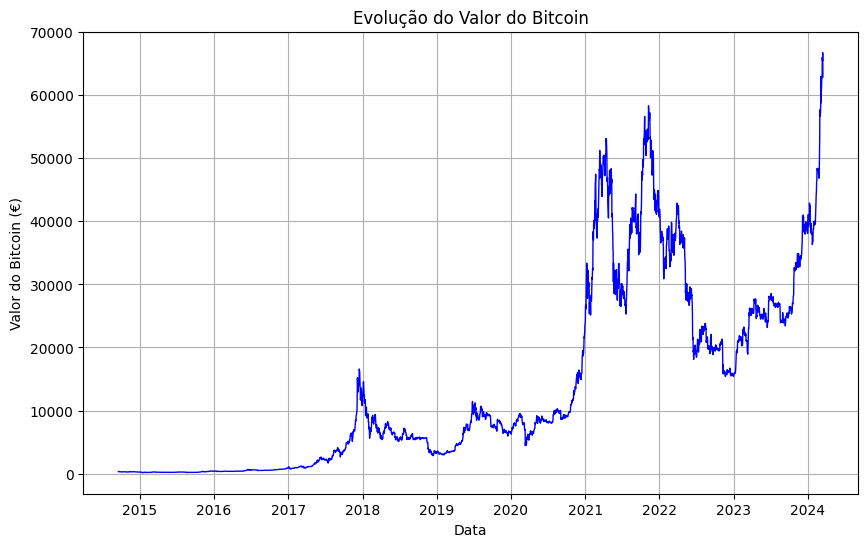

In [49]:
# Ordenando o DataFrame pela coluna de datas
df = df.sort_values(by='Data')

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Fechamento Ajustado'], color='blue', linewidth=1)
plt.title('Evolução do Valor do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Valor do Bitcoin (€)')
plt.grid(True)
plt.show()